In [2]:
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe() # A brief overview

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Univariate Analysis and Statistical Misleading

As the name suggests, we analyse a single variable/field of the data set, namely Annual Income k$

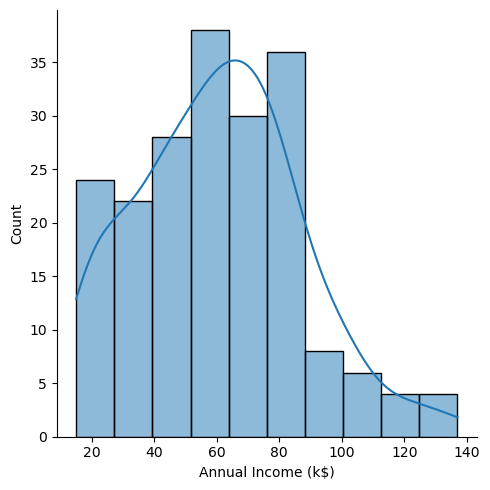

In [6]:
sns.displot(df['Annual Income (k$)'],kde=True);

The above plot depicts a histogram which is super imposed with a Kernal Denisty Estimation

A histogram groups together values and creates a count for each value

Each group is called a 'bin', each bin has a set interval or binwidth

What's the binwidth for the above histogram you ask?

Apply simple division, the total range of values with the number of bins


In [7]:
binwidth = (max(df['Annual Income (k$)']) - min(df['Annual Income (k$)']))/10
print(f'Binwidth = {binwidth}')

Binwidth = 12.2


Binwidth has a massive impact on the histogram distribution, it will significantly skew results if it's too low or too high

This aspect has been used to misrepresent data and skew results to serve narratives.

The histogram above with a binwdith of 12.2 is a nice approximate of a normal distribution, what happens if I reduce it to 1?

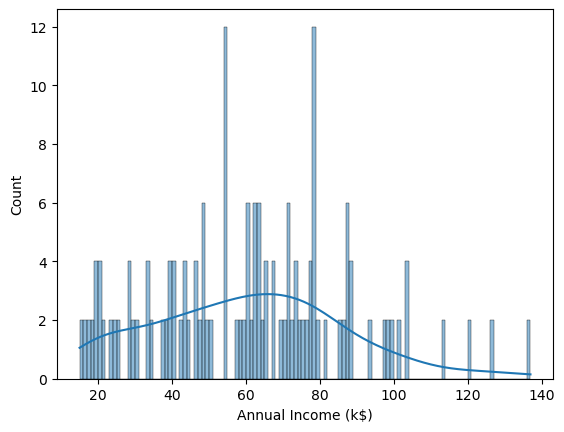

In [8]:
sns.histplot(data = df['Annual Income (k$)'], binwidth=1,kde=True);

The graph is now extremely noisy, with so many random outliers, KDE curve has been flattened

You can check this Wikipedia article to see different methods that have been used to misrepresent data by fine tuning certain paramaters for any stats tool.

https://en.wikipedia.org/wiki/Misleading_graph

This book is also great

https://en.wikipedia.org/wiki/How_to_Lie_with_Statistics


My point is, we should not trust visualizations at face value, we must verify the paramaters used, core business decisions could be affected due to skewed visualizations.

Now let's create a histogram for each variable in our data set

To do so we will simply loop through each variable

In [9]:
df.columns # To quickly get column names

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

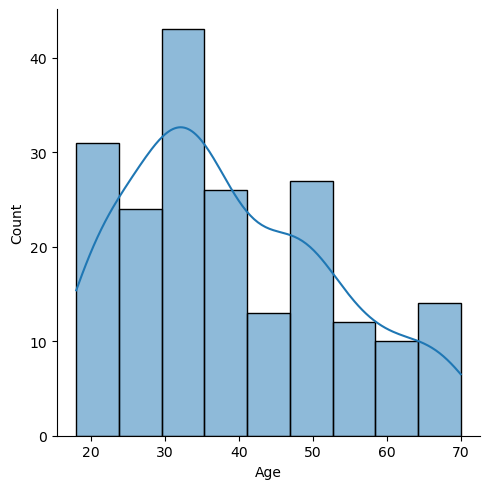

<Figure size 640x480 with 0 Axes>

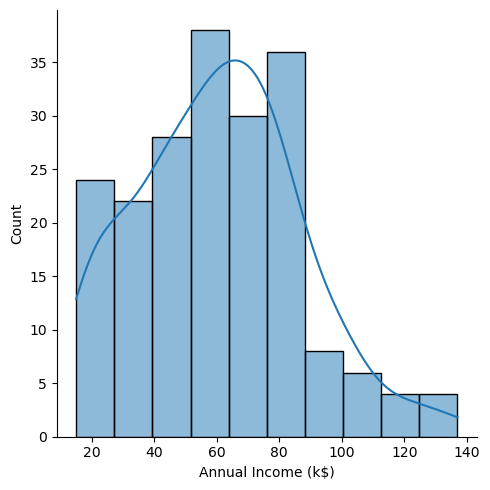

<Figure size 640x480 with 0 Axes>

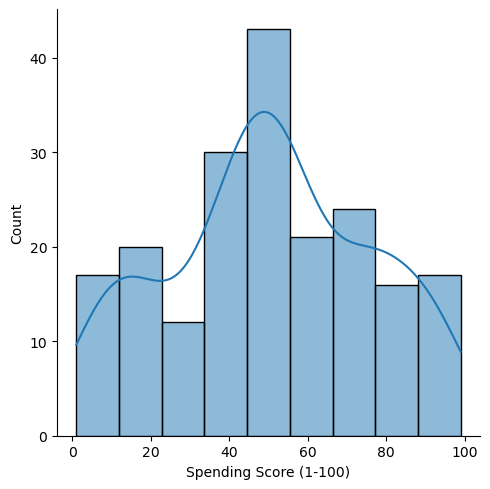

In [10]:
cols = [ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for var in cols:
    plt.figure()
    sns.displot(df[var],kde = True)
    

Let's check annual income genderwise, a KDE plot will be fine, it essentially plots probability density for our Annual income variable

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

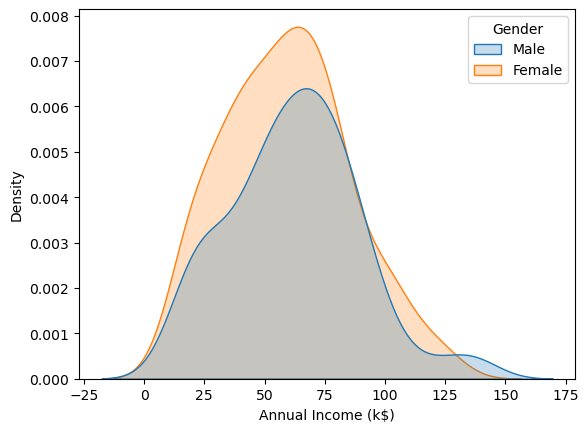

In [11]:
sns.kdeplot(x = df['Annual Income (k$)'], fill = True, hue = df['Gender'])

For later: culture, physiology, sociopathy, psychopathy and NPD

The above plot shows mostly a normal distribution, with more women earning a median income of around 65k and men having having outliers earning
around 170k.

Let's plot for other variables as well

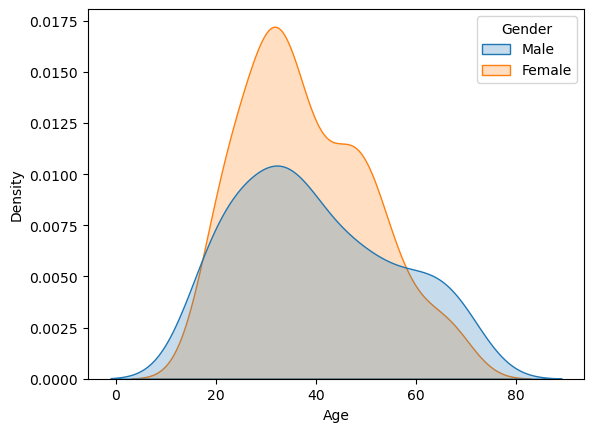

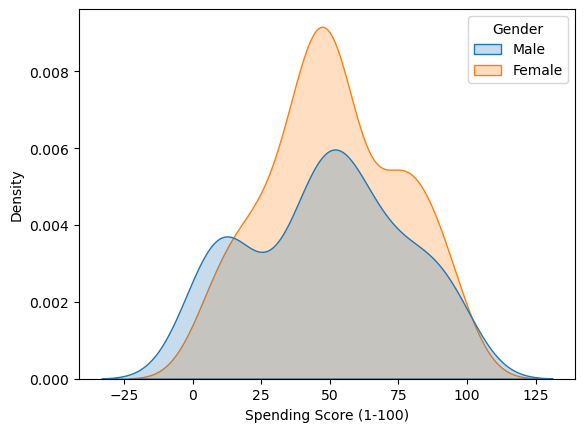

In [12]:
for var in cols:
    if var == 'Annual Income (k$)':
        continue
    plt.figure()
    sns.kdeplot(x=df[var], fill = True, hue = df['Gender']);


Even though we can make out medians and outliers using KDE plots, it's much more clear on box plots

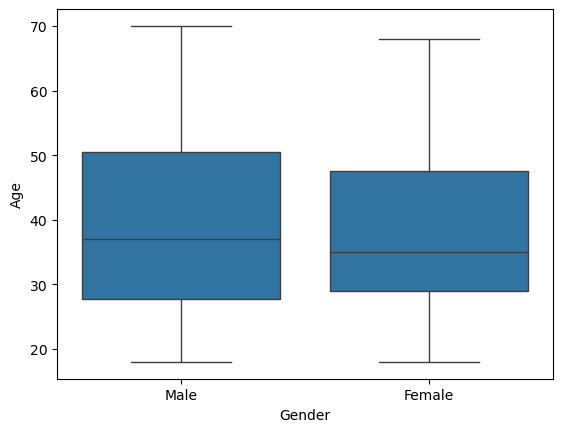

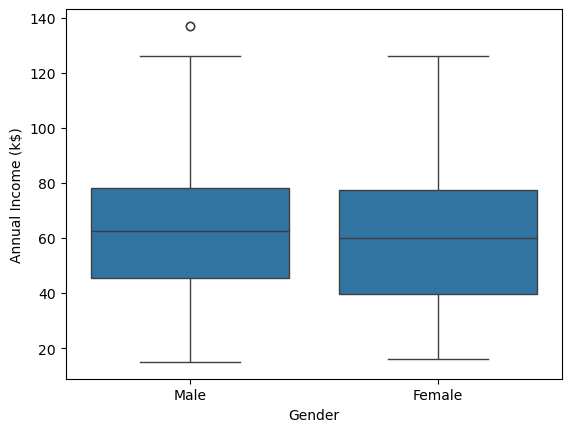

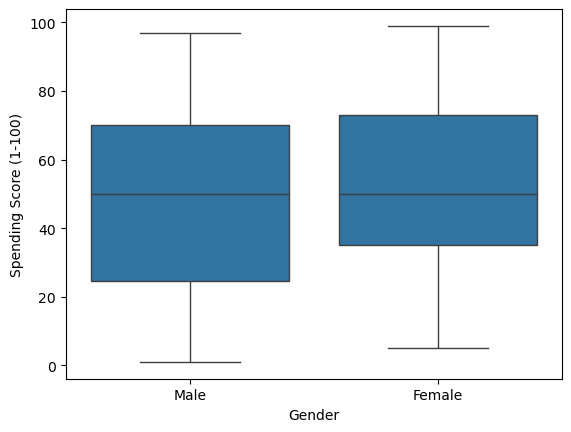

In [13]:
for var in cols:
    plt.figure()
    sns.boxplot(y =df[var], x = df['Gender']);


For annual income, the outlier is indicated by the small circle

In [14]:
df['Gender'].value_counts(normalize = True) #Ratio of Males vs Females

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

We usually use scatter plot for Bivariate Analysis

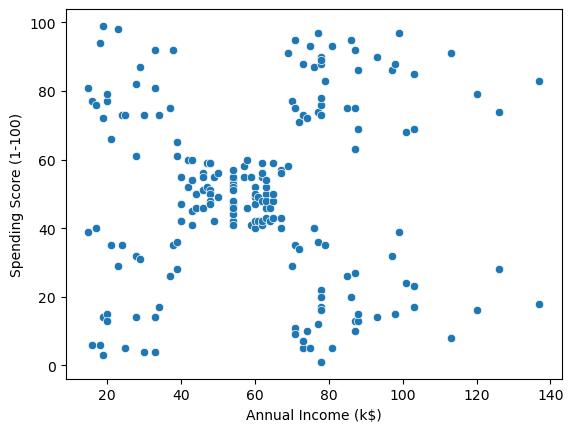

In [15]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)'); # 5 clusters would be a good fit on a first look

We can already make out clusters!

We can analyse other variables one by one, but we can make use of a pair plot to visualize histograms and scatter plots together,
for all variable pairs.

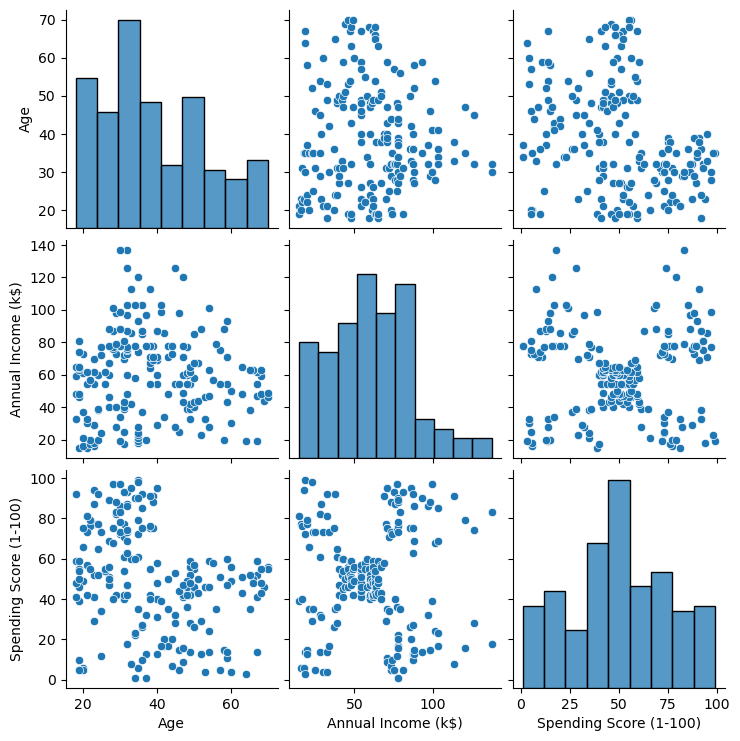

In [16]:
df = df.drop('CustomerID', axis = 1 ) #CustomerID is not a useful variable as you can guess.
sns.pairplot(df)

We can also analyse by gender

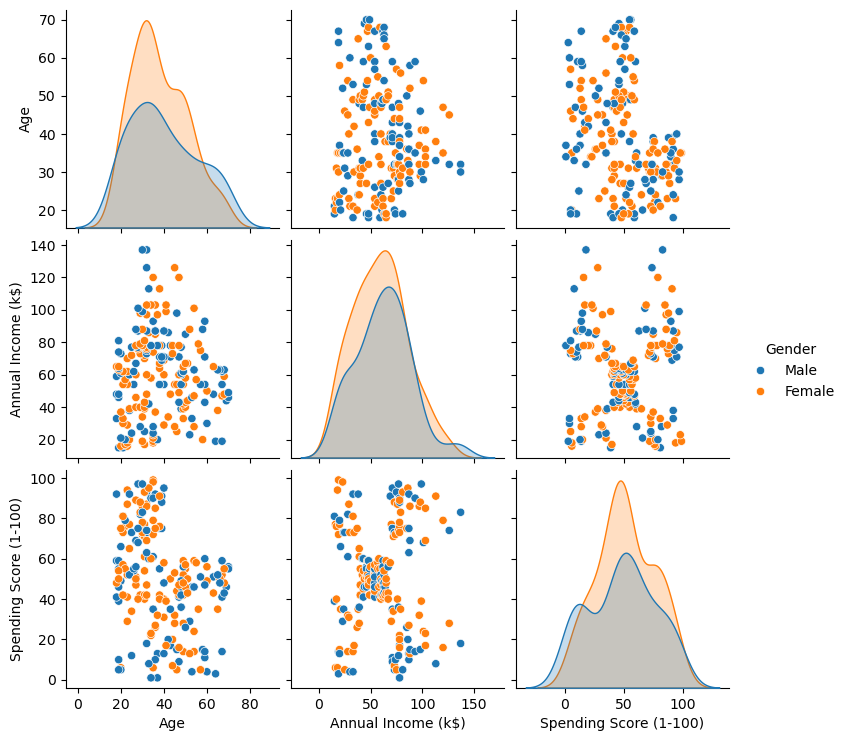

In [17]:
sns.pairplot(df, hue = 'Gender')

In [18]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [19]:
df.corr(numeric_only= True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


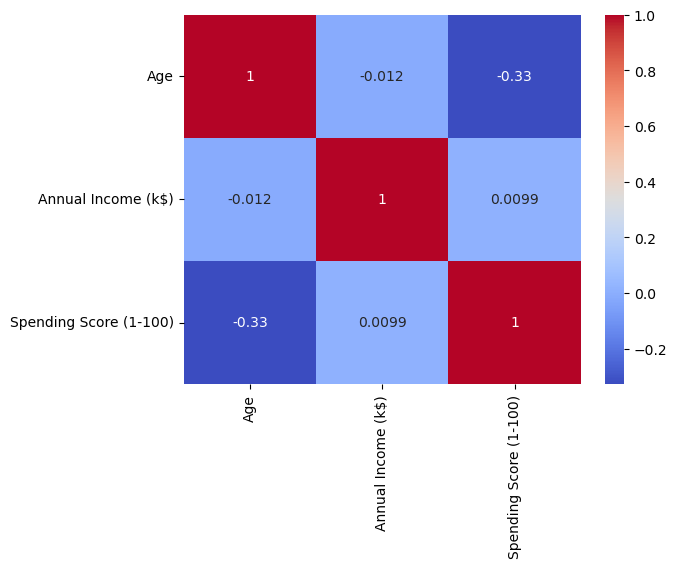

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap = 'coolwarm');

# Clustering Univariate, Bivariate and Multivariate

In [21]:
rclustering1 = KMeans(n_clusters=4) #review and annotate all of this later on, you are kinda sleepy now, this is a KMeans object, we chose 4 for a reason

In [22]:
clustering1.fit(df[['Annual Income (k$)']]) #fit needs a dataframe, ie a table/2D list

/lib/python3.13/site-packages/threadpoolctl.py:1123: RuntimeWarning: JsProxy.as_object_map() is deprecated. Use as_py_json() instead.
  for filepath in LDSO.loadedLibsByName.as_object_map():


,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [23]:
clustering1.labels_ #creates an array containing cluster labels for each record of our df, we will need to add it as a variable/column to our df

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

As you can see for univariate clustering, data is simply clustered into continous bins, exactly like histograms.

In [24]:
df['Income Cluster'] = clustering1.labels_

In [25]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


We can quickly compute summary stats for each cluster now

In [26]:
df['Income Cluster'].value_counts()

Income Cluster
2    68
3    62
1    50
0    20
Name: count, dtype: int64

But what's the ideal number of clusters for our data set?

We use the 'Elbow Method' (Not really the best or ideal method, but gets the job done)

In [27]:
inertia_scores = []
for i in range(1,11):
    kmeans =KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    print(f'Number of clusters = {i} Inertia is {kmeans.inertia_}')
    inertia_scores.append(kmeans.inertia_)
    

Number of clusters = 1 Inertia is 137277.2800000002
Number of clusters = 2 Inertia is 48660.88888888887
Number of clusters = 3 Inertia is 25640.457784396807
Number of clusters = 4 Inertia is 13278.112713472474
Number of clusters = 5 Inertia is 8684.33092460881
Number of clusters = 6 Inertia is 5081.484660267269
Number of clusters = 7 Inertia is 4201.807137307138
Number of clusters = 8 Inertia is 3021.5955988456008
Number of clusters = 9 Inertia is 2168.478715728716
Number of clusters = 10 Inertia is 1938.0841630591633


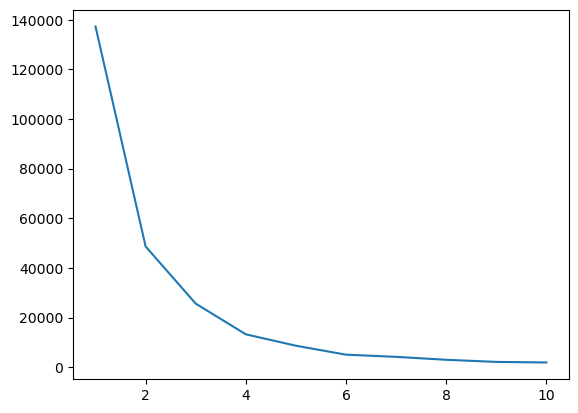

In [28]:
plt.plot(range(1,11),inertia_scores)

The elbow starts at 3 or 4, let's take 4

Now we can group data by clusters

In [29]:
df.columns


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [30]:
tmp_df = df.drop('Gender', axis = 1) #Cannot calculate mean for a categorical variable, need to drop it
tmp_df.groupby(['Income Cluster']).mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.600000,109.700000,52.000000
1,35.280000,27.400000,49.480000
2,43.970588,54.764706,50.014706
3,36.838710,77.806452,50.403226


In [31]:
#Bivariate Clustering

clustering2 = KMeans(n_clusters= 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,3
2,Female,20,16,6,1,1
3,Female,23,16,77,1,3
4,Female,31,17,40,1,1


In [32]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,3
2,Female,20,16,6,1,1
3,Female,23,16,77,1,3
4,Female,31,17,40,1,1


In [33]:
clustering2.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [34]:
inertia_scores = []

for i in range(1,11):
    kmeans =KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    print(f'Number of clusters = {i} Inertia is {kmeans.inertia_}')
    inertia_scores.append(kmeans.inertia_)


Number of clusters = 1 Inertia is 269981.28000000014
Number of clusters = 2 Inertia is 183653.3289473683
Number of clusters = 3 Inertia is 106348.37306211119
Number of clusters = 4 Inertia is 73880.64496247198
Number of clusters = 5 Inertia is 44448.45544793369
Number of clusters = 6 Inertia is 37442.24745037571
Number of clusters = 7 Inertia is 34169.69411204736
Number of clusters = 8 Inertia is 28707.285166868012
Number of clusters = 9 Inertia is 22910.223123417476
Number of clusters = 10 Inertia is 19728.449114614337


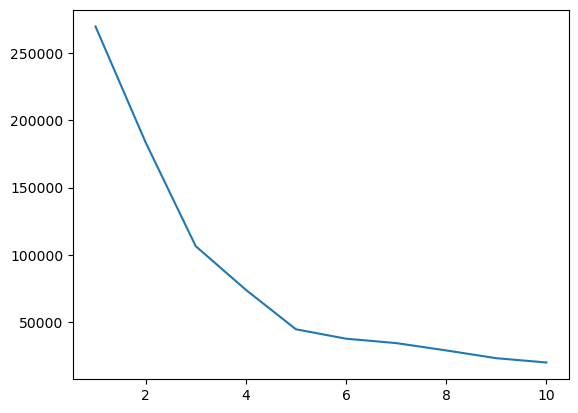

In [35]:
plt.plot(range(1,11), inertia_scores)

This confirms that 5 clusters would indeed be a good amount of clusters

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

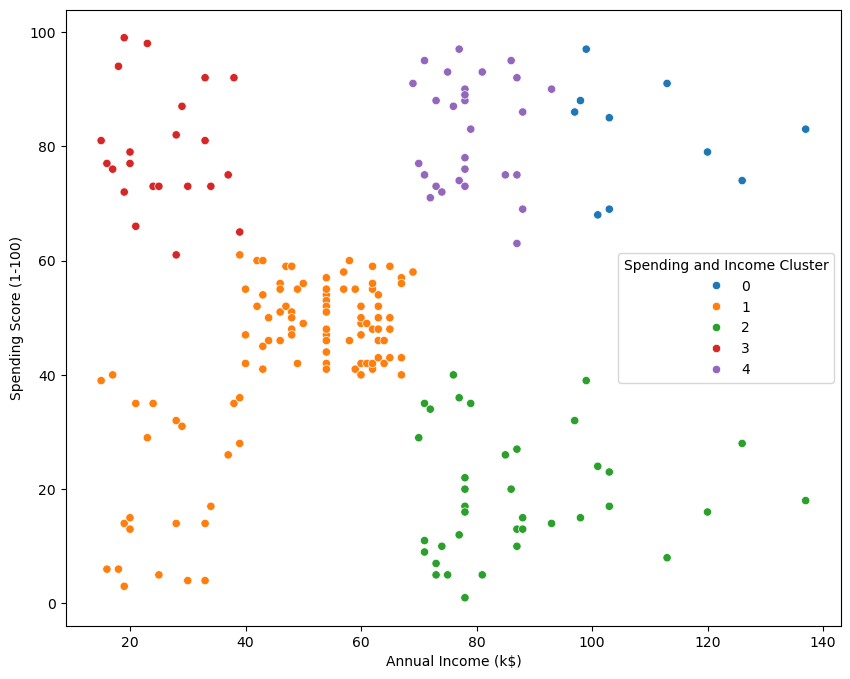

In [36]:
plt.figure(figsize=(10,8)) # Resizing
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette='tab10')

This time we color code it cluster wise

In [37]:
clustering2.cluster_centers_

array([[109.7       ,  82.        ],
       [ 48.16831683,  43.3960396 ],
       [ 87.        ,  18.63157895],
       [ 25.72727273,  79.36363636],
       [ 78.55172414,  82.17241379]])

We can mark the centroids, but first we need to make a data frame out of this

In [38]:
Centers = pd.DataFrame(clustering2.cluster_centers_)
Centers.columns = ['x','y']

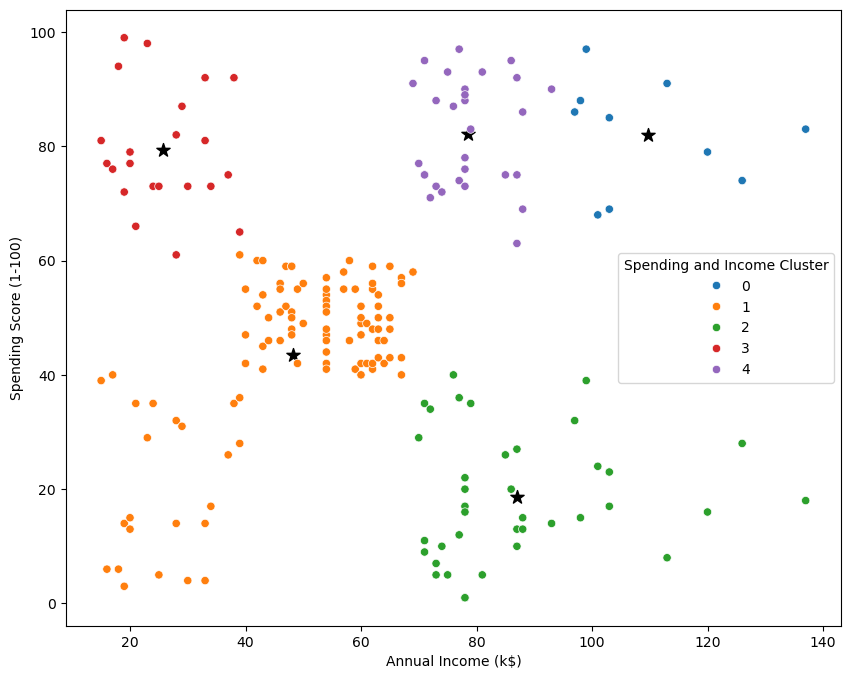

In [64]:
plt.figure(figsize=(10,8)) # Resizing
plt.scatter(x=Centers['x'],y = Centers['y'], s=100, c='black',marker='*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette='tab10')
plt.savefig('IncomeVSSpendingStoreCluster_Bivariate.png')

We can analyse male and female % for each cluster

In [40]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.600000,0.400000
1,0.594059,0.405941
2,0.473684,0.526316
3,0.590909,0.409091
4,0.517241,0.482759


Our ideal clusters would have a high spending score and a high annual income, that is cluster number 2

In [42]:
tmp_df = df.drop('Gender', axis = 1)
tmp_df.groupby('Spending and Income Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
Spending and Income Cluster,,,,
0,32.200000,109.700000,82.000000,0.000000
1,43.603960,48.168317,43.396040,1.772277
2,40.394737,87.000000,18.631579,2.210526
3,25.272727,25.727273,79.363636,1.000000
4,32.862069,78.551724,82.172414,3.000000


Cluster 4 has a decently high annual incame and the highest spending score, as discussed above we should target cluster 4 and conduct campaigns for them

In [1]:
#multivariate clustering
from sklearn.preprocessing import StandardScaler

In [44]:
scale = StandardScaler()

In [51]:
new_df = pd.get_dummies(df, dtype= int,drop_first=True) # To turn gender into numerical values, look a bit more into this method

In [52]:
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,1,1
1,21,15,81,1,3,1
2,20,16,6,1,1,0
3,23,16,77,1,3,0
4,31,17,40,1,1,0


In [53]:
new_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [55]:
new_df = new_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']] # do not include the cluster cols for scaling
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [58]:
new_df = pd.DataFrame(scale.fit_transform(new_df))
new_df.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


Number of clusters = 1 Inertia is 800.0000000000006
Number of clusters = 2 Inertia is 597.9472937932285
Number of clusters = 3 Inertia is 509.03351151016324
Number of clusters = 4 Inertia is 395.5474375147564
Number of clusters = 5 Inertia is 333.48550448755725
Number of clusters = 6 Inertia is 278.4837763135171
Number of clusters = 7 Inertia is 240.08345812176518
Number of clusters = 8 Inertia is 217.34681862847106
Number of clusters = 9 Inertia is 192.14015833710326
Number of clusters = 10 Inertia is 183.48974134825045


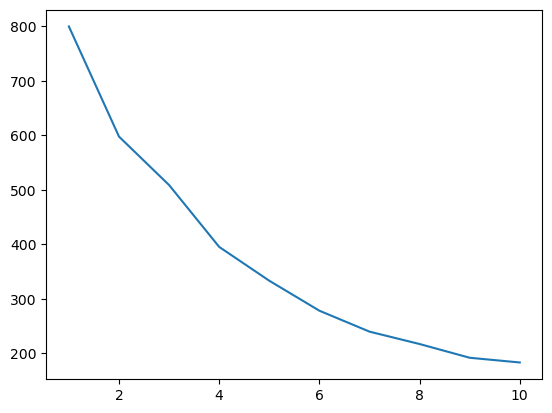

In [62]:
# we calculate the inertia of our scaled data frame
inertia_scores = []
# should turn this into a function actually
for i in range(1,11):
    kmeans =KMeans(n_clusters = i)
    kmeans.fit(new_df)
    print(f'Number of clusters = {i} Inertia is {kmeans.inertia_}')
    inertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_scores)





In [63]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,3
2,Female,20,16,6,1,1
3,Female,23,16,77,1,3
4,Female,31,17,40,1,1
...,...,...,...,...,...,...
195,Female,35,120,79,0,0
196,Female,45,126,28,0,2
197,Male,32,126,74,0,0
198,Male,32,137,18,0,2


In [65]:
df.to_csv('clustering.csv') #We save our cluster data